In [1]:
from MostJoints.getMostInformativeJoints import *

In [2]:
import os
TRAINING_SUBJECTS = ['s01','s03','s05','s07','s09']
TESTING_SUBJECTS = ['s02','s04','s06','s08','s10']
data_file_names = os.listdir('data/')
print("Number of video files: ", len(data_file_names))
train_data_file_names = [data_file_names[i] for i in range(len(data_file_names)) if data_file_names[i][4:7] in TRAINING_SUBJECTS]
test_data_file_names = [data_file_names[i] for i in range(len(data_file_names)) if data_file_names[i][4:7] in TESTING_SUBJECTS]

Number of video files:  570


In [6]:
from itertools import chain
d1 = {'a0' + str(i) : 0 for i in range(1,10)}
d2 = {'a' + str(i) : 0 for i in range(10, 21)}
mostInformativeJointsList = dict(chain.from_iterable(d.items() for d in (d1,d2)))

In [7]:
mostInformativeJointsList

{'a01': 0,
 'a02': 0,
 'a03': 0,
 'a04': 0,
 'a05': 0,
 'a06': 0,
 'a07': 0,
 'a08': 0,
 'a09': 0,
 'a10': 0,
 'a11': 0,
 'a12': 0,
 'a13': 0,
 'a14': 0,
 'a15': 0,
 'a16': 0,
 'a17': 0,
 'a18': 0,
 'a19': 0,
 'a20': 0}

In [8]:
for i in range(len(train_data_file_names)):
    mostInformativeJointsList[train_data_file_names[i][0:3]] += 1 

In [9]:
mostInformativeJointsList

{'a01': 15,
 'a02': 15,
 'a03': 15,
 'a04': 14,
 'a05': 15,
 'a06': 15,
 'a07': 14,
 'a08': 15,
 'a09': 15,
 'a10': 15,
 'a11': 15,
 'a12': 15,
 'a13': 15,
 'a14': 15,
 'a15': 9,
 'a16': 15,
 'a17': 15,
 'a18': 15,
 'a19': 15,
 'a20': 15}

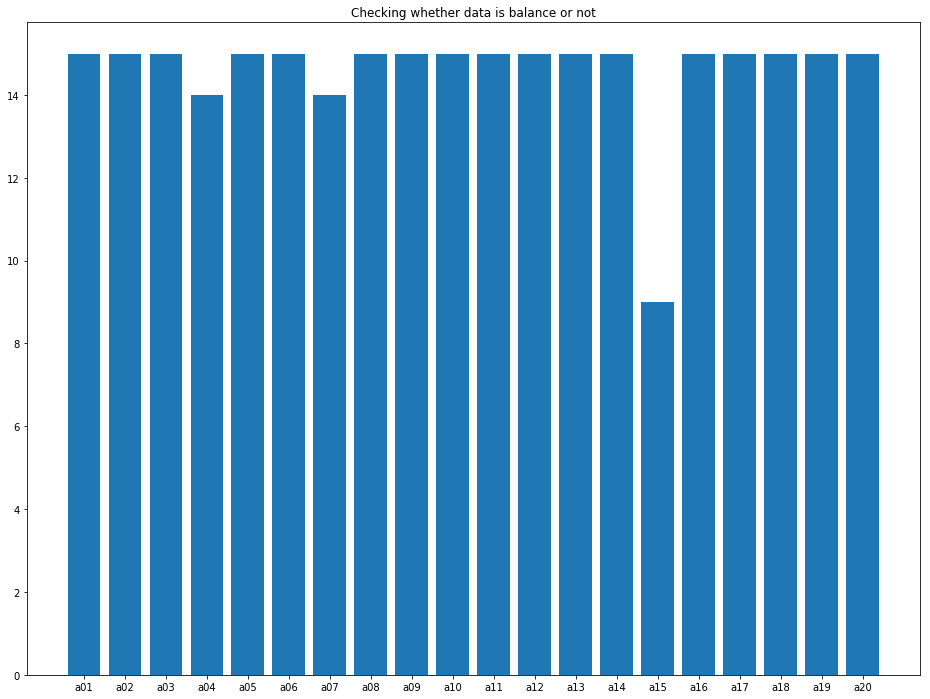

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,12))
plt.bar(range(len(mostInformativeJointsList)), list(mostInformativeJointsList.values()), align='center')
plt.xticks(range(len(mostInformativeJointsList)), list(mostInformativeJointsList.keys()))
plt.title('Checking whether data is balance or not')
plt.show()
